In [1]:
import numpy as np
import time
from functools import wraps

Timing Function

In [2]:
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__} took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

Spatial heterogeneity function

In [3]:
@timeit
def SH(f):
    m=np.mean(f)
    G=0
    d1=f.shape[0]
    d2=f.shape [1]
    f =np.hstack((f, f))
    f =np.vstack((f, f))

    for y1 in range(d1+1):
        for y2 in range(y1+1,y1+d1+1):
            for x1 in range(d2+1):
                for x2 in range(x1+1,x1+d2+1):
                    fbar=f[y1:y2,x1:x2]
                    G+= abs(np.mean(fbar)-m)

    G = G/(d1*d1*d2*d2)
    
    return G


Modified SH function - Compute SH with random collection of array subset permutations

In [4]:
@timeit
def SH_random(f, n_permutations, permutation_array=None):
    """Compute the spatial heterogeneity metric from a random subset of permutations
    """
    m=np.mean(f)
    G=0
    d1=f.shape[0]
    d2=f.shape[1]
    total_permutes = d1*d2*(d1+1)*(d2+1)
    
    if permutation_array is None:
        permutation_array = SH_permutations(f)

    f =np.hstack((f,f))
    f =np.vstack((f,f))
    rng = np.random.default_rng()
    random_permuation_idx = rng.choice(total_permutes, size=n_permutations, replace=False)
    random_permutations = permutation_array[random_permuation_idx, :]
    f_permutes = np.empty((n_permutations, f.flatten().shape[0]))
    f_permutes[:] = np.nan

    i = 0
    for permute in random_permutations:
        x1 = permute[0]
        x2 = permute[1]
        y1 = permute[2]
        y2 = permute[3]
        f_subset = f[y1:y2,x1:x2].flatten()

        f_permutes[i, 0:f_subset.shape[0]] = f_subset
        i += 1
        
    G = abs(np.nanmean(f_permutes, axis=1)-m).sum()

    return total_permutes*G/(n_permutations*d1*d1*d2*d2)

@timeit
def SH_permutations(f):
    """Generate all permutations (subsets of f) for the SH metric"""
    d1=f.shape[0]
    d2=f.shape[1]
    total_permutes = d1*d2*(d1+1)*(d2+1)
    f =np.hstack((f,f))
    f =np.vstack((f,f))
    permutation_array = np.zeros((total_permutes, 4)).astype(int)
    count = 0
    for y1 in range(d1+1):
        for y2 in range(y1+1,y1+d1+1):
            for x1 in range(d2+1):
                for x2 in range(x1+1,x1+d2+1):
                    permutation_array[count, 0] = x1
                    permutation_array[count, 1] = x2
                    permutation_array[count, 2] = y1
                    permutation_array[count, 3] = y2

                    count += 1
                
    return permutation_array

In [5]:
d1, d2 = 10, 10
array = np.random.random((d1, d2))
total_permutes = d1*d2*(d1+1)*(d2+1)
n_permutations = 5000

In [10]:
# The code can either be throttled by the number of permutations to loop over 
# and compute the heterogenity for, or the size of the array, which makes the 
# permuation for loop more costly
G = SH_random(array, n_permutations)


Function SH_permutations took 0.0183 seconds
Function SH_random took 0.0941 seconds


In [11]:
# Test with pre-computing the permutation array and passing it to SH_random
permutation_array = SH_permutations(array)
G = SH_random(array, n_permutations, permutation_array=permutation_array)

Function SH_permutations took 0.0183 seconds
Function SH_random took 0.0784 seconds


In [12]:
G_star = SH(array)

Function SH took 0.1634 seconds


In [13]:
G_error = 100*(G-G_star)/G_star
print(f'Percent error: {G_error:3.2f}% calculating SH with {n_permutations} out of {total_permutes} total permutations')

Percent error: -1.67% calculating SH with 5000 out of 12100 total permutations


In [14]:
d1, d2 = 10, 10
array = np.random.random((d1, d2))
G_star = SH(array)
total_permutes = d1*d2*(d1+1)*(d2+1)

permutation_array = SH_permutations(array)

G_estimates = []
n_perms = np.arange(100, total_permutes, 10)
n_repeats = 0
for perm in n_perms:
    G_array = np.empty((1,n_repeats+1))
    for i in range(n_repeats+1):
        G = SH_random(array, n_permutations=perm, permutation_array=permutation_array)
        G_array[0][i] = G
    G_estimates.append(G_array.mean())

Function SH took 0.1635 seconds
Function SH_permutations took 0.0096 seconds
Function SH_random took 0.0021 seconds
Function SH_random took 0.0018 seconds
Function SH_random took 0.0013 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0013 seconds
Function SH_random took 0.0013 seconds
Function SH_random took 0.0012 seconds
Function SH_random took 0.0025 seconds
Function SH_random took 0.0025 seconds
Function SH_random took 0.0025 seconds
Function SH_random took 0.0029 seconds
Function SH_random took 0.0024 seconds
Function SH_random took 0.0022 seconds
Function SH_random took 0.0026 seconds
Function SH_random took 0.0025 seconds
Function SH_random took 0.0026 seconds
Function SH_random took 0.0027 seconds
Function SH_random took 0.0027 seconds
Function SH_random took 0.0033 seconds
Function SH_random took 0.0034 seconds
Function SH_random took 0.0035 seconds
Function SH_random took 0.0035 seconds
Function SH_random took 0.

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0, '(# Permutations Randomly Selected) / (Total Permutations)')

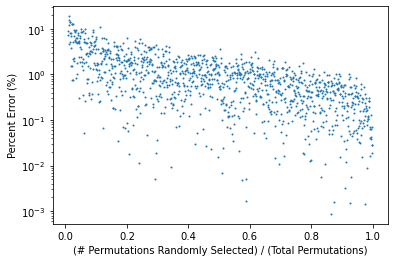

In [17]:
plt.plot(n_perms/total_permutes, abs(100*(G_estimates-G_star)/G_star), marker='o', 
         linestyle='none', markersize=1)
#plt.axhline(y=G_star, c='k')
plt.yscale('log')
plt.ylabel('Percent Error (%)')
plt.xlabel('(# Permutations Randomly Selected) / (Total Permutations)')


In [21]:
def checkerboard(fx, fy, nx, ny):
    xrange, yrange = nx, ny

    k = fx*2*np.pi/xrange #wavenumber 2pi / L
    m = fy*2*np.pi/yrange

    epsilon = 0.001

    x=np.arange(xrange)
    y=np.arange(yrange)
    X,Y=np.meshgrid(x,y)
    #define a 2D wave using the parameters (A, k, and c)

    A = 1
    phi=A*np.sin(k*X+epsilon)*A*np.sin(m*Y+epsilon)
    gradx, grady = np.gradient(phi)

    phi_star = phi.copy()

    phi_star[phi_star > 0] = 1
    phi_star[phi_star <= 0] = 0

    return x, y, phi_star

In [75]:
d1, d2 = 10, 10
x, y, phi_star = checkerboard(fx=1, fy=1, nx=d1, ny=d2)
G_star = SH(phi_star)
total_permutes = d1*d2*(d1+1)*(d2+1)

permutation_array = SH_permutations(phi_star)

G_estimates = []
n_perms = np.arange(100, total_permutes, 10)
n_repeats = 0
for perm in n_perms:
    G_array = np.empty((1,n_repeats+1))
    for i in range(n_repeats+1):
        G = SH_random(phi_star, n_permutations=perm, permutation_array=permutation_array)
        G_array[0][i] = G
    G_estimates.append(G_array.mean())

Function SH took 0.0974 seconds
Function SH_permutations took 0.0066 seconds
Function SH_random took 0.0017 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0009 seconds
Function SH_random took 0.0009 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0008 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0009 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0009 seconds
Function SH_random took 0.0009 seconds
Function SH_random took 0.0012 seconds
Function SH_random took 0.0012 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0011 seconds
Function SH_random took 0.0010 seconds
Function SH_random took 0.0014 seconds
Function SH_random took 0.0012 seconds
Function SH_random took 0.0012 seconds
Function SH_random took 0.

Text(0.5, 0, '(# Permutations Randomly Selected) / (Total Permutations)')

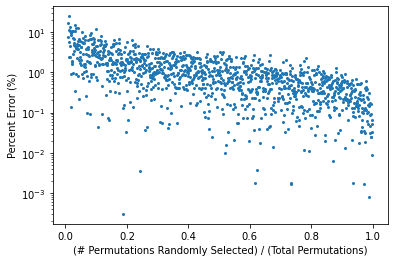

In [77]:
plt.plot(n_perms/total_permutes, abs(100*(G_estimates-G_star)/G_star), marker='o', 
         linestyle='none', markersize=2)
#plt.axhline(y=G_star, c='k')
#plt.yscale('log')
plt.ylabel('Percent Error (%)')
plt.xlabel('(# Permutations Randomly Selected) / (Total Permutations)')

In [19]:
import pandas as pd

In [26]:
df = pd.DataFrame()
i = 0
nx, ny = 10, 10

for n in [50]:
    nx, ny = n, n
    for fx in [0, 1, 2]:
        for fy in [0, 1, 2]:
            print(f'fx={fx}, fy={fy}')
            x, y, profile = checkerboard(fx, fy, nx, ny)
            #permutation_array = SH_permutations(profile)
            G = SH(profile)
            #G = SH_random(profile, n_permutations=12100, permutation_array=permutation_array)
            print(f'...SH={G}')
            df.loc[i, 'fx'] = fx
            df.loc[i, 'fy'] = fy
            df.loc[i, 'nx'] = nx
            df.loc[i, 'ny'] = ny
            df.loc[i, 'SH'] = G
            i += 1


fx=0, fy=0
Function SH took 63.0264 seconds
...SH=0.0
fx=0, fy=1
Function SH took 64.3566 seconds
...SH=0.25739773119243553
fx=0, fy=2
Function SH took 61.2877 seconds
...SH=0.15662612208277918
fx=1, fy=0
Function SH took 61.5823 seconds
...SH=0.25739773119275866
fx=1, fy=1
Function SH took 61.5293 seconds
...SH=0.12736176859538637
fx=1, fy=2
Function SH took 61.6731 seconds
...SH=0.0784596791251696
fx=2, fy=0
Function SH took 64.5700 seconds
...SH=0.15662612208252868
fx=2, fy=1
Function SH took 65.3169 seconds
...SH=0.07845967912514064
fx=2, fy=2
Function SH took 64.8512 seconds
...SH=0.0484126047224006


In [95]:
df.to_clipboard()